### Project overview 
This is a project part of the Google Advanced Data Analytics. I did my first attempt and then compared to the exemplar code.

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

In [5]:
#import necessary libraries 
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load the dataset 'Invistico Airline'
df_original = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Machine_Learning_Python\Supervised learning\2. Classification\1. Logistics regression\Resources\Invistico_Airline.csv")
pd.set_option('display.max.columns', 100)

In [7]:
df_original

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


**Data dictionary**
 
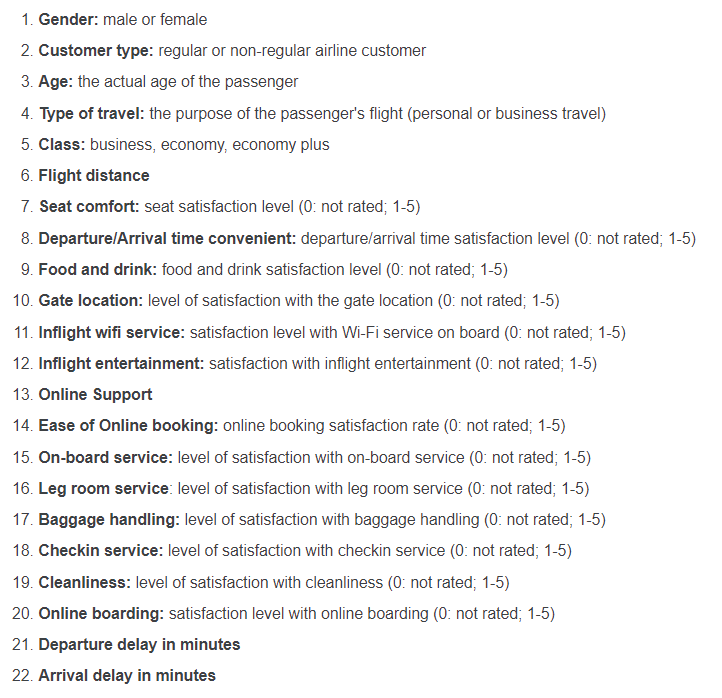

**Overall data inspcetion**

In [8]:
#Check datatypes 
df_original.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [9]:
#Check the number of satisfied customers in the dataset 
'''
So around 54.7 percent (71,087/129,880) of customers were satisfied. This value can be compared to a logistic regression model's accuracy. 
'''
df_original['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [10]:
#Check for nulls 
df_original.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
#Drop 393 nulls value for Arrival Delay in Minutes
df_subset = df_original.dropna(axis = 0).reset_index(drop = True)

In [12]:
#Change Inflight entertainment  column to float data type 
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)

In [13]:
df_subset.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment               float64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [14]:
#Change satisfaction column into numeric variables using one hot encoding technique
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()


In [15]:
df_subset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4.0,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2.0,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0.0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4.0,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3.0,4,2,2,0,2,4,2,5,0,0.0


**Create training and testing data**

In [16]:
X = df_subset['Inflight entertainment']
y = df_subset['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
x_train

110538    5.0
28727     3.0
82225     2.0
25415     3.0
73582     2.0
         ... 
128106    4.0
103694    5.0
860       3.0
15795     4.0
121958    5.0
Name: Inflight entertainment, Length: 90640, dtype: float64

In [17]:
# If X_train is currently a 1D array, reshape it to 2D
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
x_train

array([[5.],
       [3.],
       [2.],
       ...,
       [3.],
       [4.],
       [5.]])

**Construct the logistics regression**

In [18]:
#Construct binary logistics regression 
clf = LogisticRegression().fit(x_train,y_train)

In [19]:
#Get the parameters
print('coefficient: ', clf.coef_)
print('Intercept: ', clf.intercept_)

coefficient:  [[0.99751462]]
Intercept:  [-3.19355406]


<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

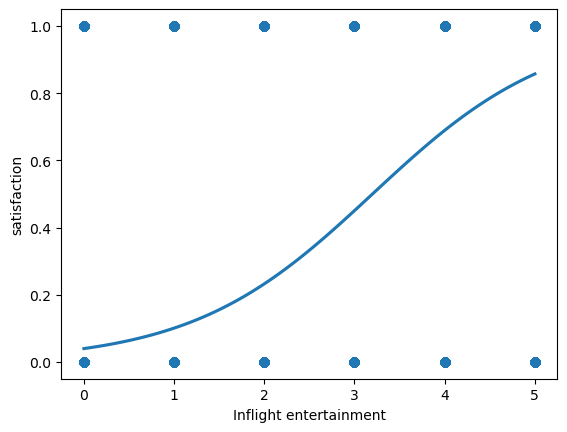

In [20]:
#Visualize the logistics results 
'''
The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction,
 though this is currently not the most informative plot. The graph currently doesn't provide much 
 insight into the data points, as Inflight entertainment is categorical.
'''
sns.regplot(data = df_subset, x= 'Inflight entertainment', y= 'satisfaction', logistic= True, ci= None)

**Results and evaluation**

In [21]:
y_pred = clf.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [22]:
# Use predict_proba to output a probability.
clf.predict_proba(x_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

In [23]:
#Evaluation metrics 
print("Accuracy:",  metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:",  metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8015290756042938
Precision: 0.8161420273561926
Recall: 0.8215296114673708
F1 Score: 0.8188269574208101


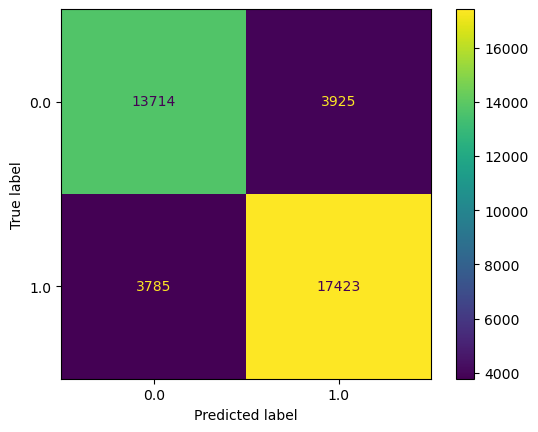

In [24]:
#Confusion metrics 
'''
Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix,
 it's clear that these numbers relate to false positives and false negatives. 
Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.
'''
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

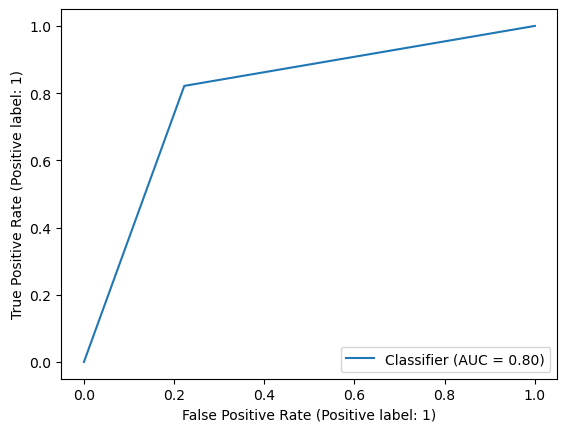

In [25]:
#Create a ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 